In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re

In [129]:
#Airline and Airport Customer Reviews Dataset
df = pd.read_csv("C:\\Users\\Galaxy Computers\\Desktop\\BA_reviews.csv")
df.head()

,Unnamed: 0,Review,Stars
0,0,✅ Trip Verified | Easy check in a T5. Galleri...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5
1,1,"Not Verified | Flight delayed by an hour, it ...",8
2,2,Not Verified | The staff are very rude and not...,2
3,3,✅ Trip Verified | Good domestic flight operat...,2
4,4,Not Verified | Failed at all basic travel fund...,10


In [130]:
len(df.columns)

3

In [131]:
df.tail()

,Unnamed: 0,Review,Stars
3445,3445,BA2262 on 17th Feb 2014. I was in 4A from Jama...,4
3446,3446,Domestic Edinburgh-Gatwick. Late by 40 mins bu...,1
3447,3447,LHR-BSL-LHR A319's each way check/bag drop atT...,10
3448,3448,Flew on a 777-200 from London Heathrow to San ...,7
3449,3449,DME-LHR. B747-400. Used Avios to sample the 'n...,2


## Data Cleaning

In [132]:
df.drop(columns='Unnamed: 0', inplace=True)

##### Fill None values with the mean of the column

In [133]:
df['Stars'].value_counts()

1                                804
2                                400
3                                380
8                                334
10                               285
9                                283
7                                280
4                                234
5                                211
6                                167
\n\t\t\t\t\t\t\t\t\t\t\t\t\t5     68
None                               4
Name: Stars, dtype: int64

In [134]:
len(df['Stars'])

3450

In [135]:
# Let's clean the 'stars' column by removing '\t' and '\n'
df['Stars'] = df['Stars'].str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

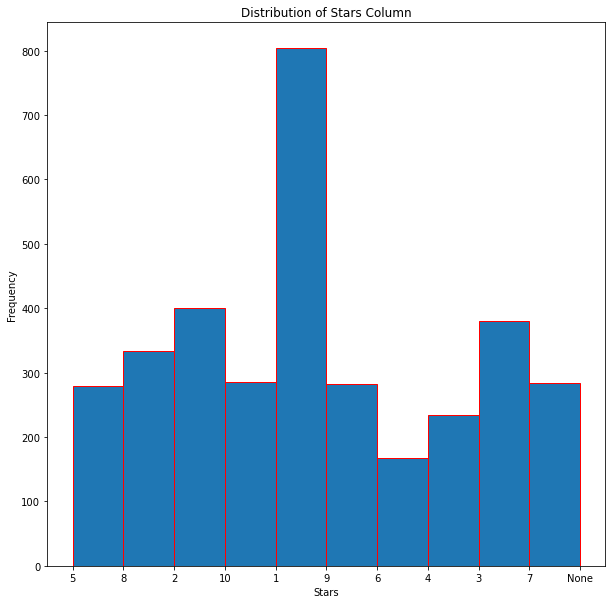

In [136]:
plt.hist(df['Stars'], bins=10, edgecolor='red') 
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.title('Distribution of Stars Column')
plt.show()

In [137]:
df.isnull().sum()

Review    0
Stars     0
dtype: int64

In [138]:
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')

df['Stars'] = df['Stars'].replace("None", pd.NA)
most_frequent_star = df['Stars'].mode()[0]
df['Stars'].fillna(most_frequent_star, inplace=True)

#### Cleaning Rewiews

In [139]:
print(df.Review.head(6),df.Review.head(6))

0    ✅ Trip Verified |  Easy check in a T5. Galleri...
1    Not Verified |  Flight delayed by an hour, it ...
2    Not Verified | The staff are very rude and not...
3    ✅ Trip Verified |  Good domestic flight operat...
4    Not Verified | Failed at all basic travel fund...
5    ✅ Trip Verified |  They lost my baggage in a v...
Name: Review, dtype: object 0    ✅ Trip Verified |  Easy check in a T5. Galleri...
1    Not Verified |  Flight delayed by an hour, it ...
2    Not Verified | The staff are very rude and not...
3    ✅ Trip Verified |  Good domestic flight operat...
4    Not Verified | Failed at all basic travel fund...
5    ✅ Trip Verified |  They lost my baggage in a v...
Name: Review, dtype: object


In [140]:
df

,Review,Stars
0,✅ Trip Verified | Easy check in a T5. Galleri...,5.0
1,"Not Verified | Flight delayed by an hour, it ...",8.0
2,Not Verified | The staff are very rude and not...,2.0
3,✅ Trip Verified | Good domestic flight operat...,2.0
4,Not Verified | Failed at all basic travel fund...,10.0
...,...,...
3445,BA2262 on 17th Feb 2014. I was in 4A from Jama...,4.0
3446,Domestic Edinburgh-Gatwick. Late by 40 mins bu...,1.0
3447,LHR-BSL-LHR A319's each way check/bag drop atT...,10.0
3448,Flew on a 777-200 from London Heathrow to San ...,7.0


In [141]:
cleaned_reviews = []
lemma = WordNetLemmatizer()

for review in df.Review:
    review = re.sub("[^a-zA-Z]", " ", review)
    review = review.lower()
    words = word_tokenize(review)
    words = [word for word in words if word not in set(stopwords.words("english"))]
    lemmatized_words = [lemma.lemmatize(word) for word in words]
    cleaned_review = " ".join(lemmatized_words)
    cleaned_reviews.append(cleaned_review)

In [142]:
df['reviews'] = cleaned_reviews

In [143]:
df

,Review,Stars,reviews
0,✅ Trip Verified | Easy check in a T5. Galleri...,5.0,trip verified easy check gallery south north l...
1,"Not Verified | Flight delayed by an hour, it ...",8.0,verified flight delayed hour happens biggie u ...
2,Not Verified | The staff are very rude and not...,2.0,verified staff rude trained properly exception...
3,✅ Trip Verified | Good domestic flight operat...,2.0,trip verified good domestic flight operated ba...
4,Not Verified | Failed at all basic travel fund...,10.0,verified failed basic travel fundamental fligh...
...,...,...,...
3445,BA2262 on 17th Feb 2014. I was in 4A from Jama...,4.0,ba th feb jamaica london gatwick need climb an...
3446,Domestic Edinburgh-Gatwick. Late by 40 mins bu...,1.0,domestic edinburgh gatwick late min unusual fl...
3447,LHR-BSL-LHR A319's each way check/bag drop atT...,10.0,lhr bsl lhr way check bag drop att took age ar...
3448,Flew on a 777-200 from London Heathrow to San ...,7.0,flew london heathrow san diego worst flight ta...


In [144]:
#Let's drop previous review column

df.drop('Review',axis=1,inplace= True)

In [145]:

#Let's do first column
new_order = ['reviews'] + [col for col in df.columns if col != 'reviews']
df = df[new_order]

In [146]:
df.head()

,reviews,Stars
0,trip verified easy check gallery south north l...,5.0
1,verified flight delayed hour happens biggie u ...,8.0
2,verified staff rude trained properly exception...,2.0
3,trip verified good domestic flight operated ba...,2.0
4,verified failed basic travel fundamental fligh...,10.0


In [147]:
df['reviews'] = df['reviews'].str.replace('trip verified', '').str.replace('verified', '')

In [148]:
df.head()

,reviews,Stars
0,easy check gallery south north lounge packed ...,5.0
1,flight delayed hour happens biggie u change g...,8.0
2,staff rude trained properly exception made ch...,2.0
3,good domestic flight operated ba cityflyer gr...,2.0
4,failed basic travel fundamental flight delaye...,10.0


### Exploratory Data Analysis

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3450 entries, 0 to 3449
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   reviews  3450 non-null   object 
 1   Stars    3450 non-null   float64
dtypes: float64(1), object(1)
memory usage: 54.0+ KB


In [150]:
df.describe()

,Stars
count,3450.000000
mean,4.669565
std,3.132861
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,10.000000


###### Average point of star rating column

In [151]:
print(round(df['Stars'].mean(), 2))

4.67


###### What star did customers give the most?

<AxesSubplot:>

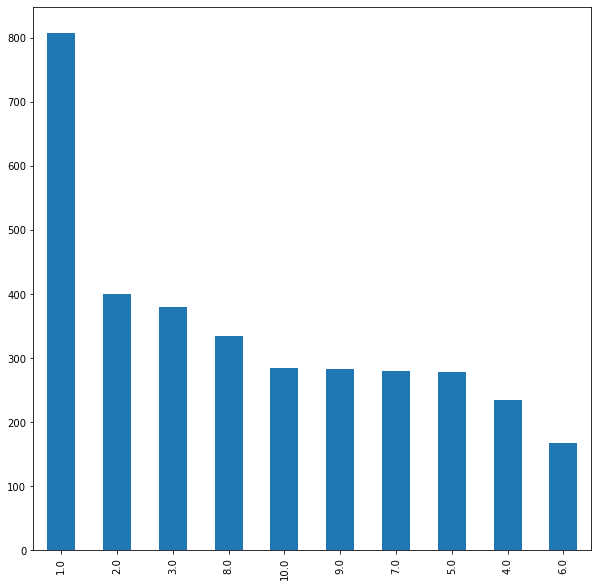

In [152]:
df.Stars.value_counts().plot(kind = 'bar')

In [153]:
df.reviews.head()

0     easy check gallery south north lounge packed ...
1     flight delayed hour happens biggie u change g...
2     staff rude trained properly exception made ch...
3     good domestic flight operated ba cityflyer gr...
4     failed basic travel fundamental flight delaye...
Name: reviews, dtype: object

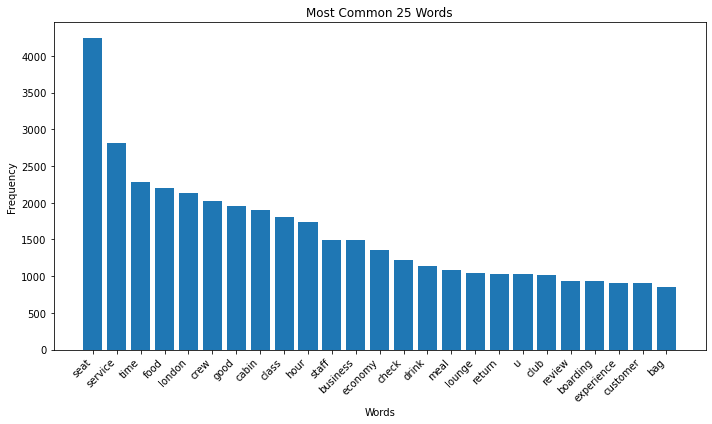

In [154]:
from collections import Counter
from sklearn.feature_extraction import text

# Combine all cleaned_reviews into a single string
reviews = " ".join(df['reviews'])

# Set stopwords
custom_stopwords = text.ENGLISH_STOP_WORDS.union(["would","ba","flight", "lhr","british","airway", "airline","plane", "told","also","passenger","wife"
                 "london", "heathrow", "aircraft", "could","even", "would"])

# Preprocess the reviews
words = reviews.split()
filtered_words = [word for word in words if word not in custom_stopwords]

# Get the most common 25 words
word_counter = Counter(filtered_words)
most_common_words = word_counter.most_common(25)

# Extract words and their frequencies for visualization
words, frequencies = zip(*most_common_words)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common 25 Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

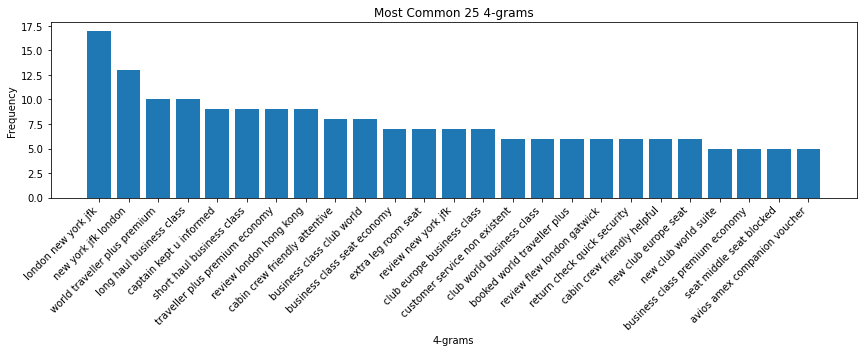

In [155]:
#Import libararies
from nltk.corpus import stopwords
from sklearn.feature_extraction import text
from nltk import FreqDist
from nltk.util import ngrams
from collections import Counter
from nltk.util import ngrams


# Combine all cleaned_reviews into a single string
reviews = " ".join(df['reviews'])

# Set stopwords
custom_stopwords = text.ENGLISH_STOP_WORDS.union(["would","ba","flight", "lhr","british","airway", "airline","plane", "told","also","passenger","wife"
                 "london", "heathrow", "aircraft", "could","even", "would"])

# Preprocess the reviews
words = reviews.lower().split()
filtered_words = [word for word in words if word not in custom_stopwords]

# N-gram analysis for 4-grams
n = 4  # Set n to 4 for 4-grams
n_grams = list(ngrams(filtered_words, n))
n_gram_counter = Counter(n_grams)
most_common_n_grams = n_gram_counter.most_common(25)

# Extract N-grams and their frequencies for visualization
n_gram_strings = [' '.join(gram) for gram, _ in most_common_n_grams]
n_gram_frequencies = [count for _, count in most_common_n_grams]

# Create a bar chart for 4-gram frequency
plt.figure(figsize=(12, 5))
plt.bar(n_gram_strings, n_gram_frequencies)
plt.xlabel(f'{n}-grams')
plt.ylabel('Frequency')
plt.title(f'Most Common 25 {n}-grams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Let's rate the reviews based on star_rating column

Bad reviews : 1-4 stars

Good reviews : 5-7 stars

Great reviews : 8-10 stars

In [159]:
# Define a function to get frequency distribution of n-grams
def get_freq_dist_ngrams(text, n, top_n):
    words = word_tokenize(text)
    n_grams = ngrams(words, n)
    ngram_freq = Counter(n_grams)
    return ngram_freq.most_common(top_n)

In [160]:
bad_reviews = df[df.Stars.isin([1, 2, 3, 4])]
good_reviews = df[df.Stars.isin([5, 6,7])]
great_reviews = df[df.Stars.isin([8, 9, 10])]

reviews_1_4 = " ".join(bad_reviews['reviews'])
reviews_5_6 = " ".join(good_reviews['reviews'])
reviews_7_10 = " ".join(great_reviews['reviews'])

# Split the text of all reviews into a list of words for each rating group
words_1_4 = reviews_1_4.split(" ")
words_5_6 = reviews_5_6.split(" ")
words_7_10 = reviews_7_10.split(" ")

##### Reviews for 1-4 star ratings

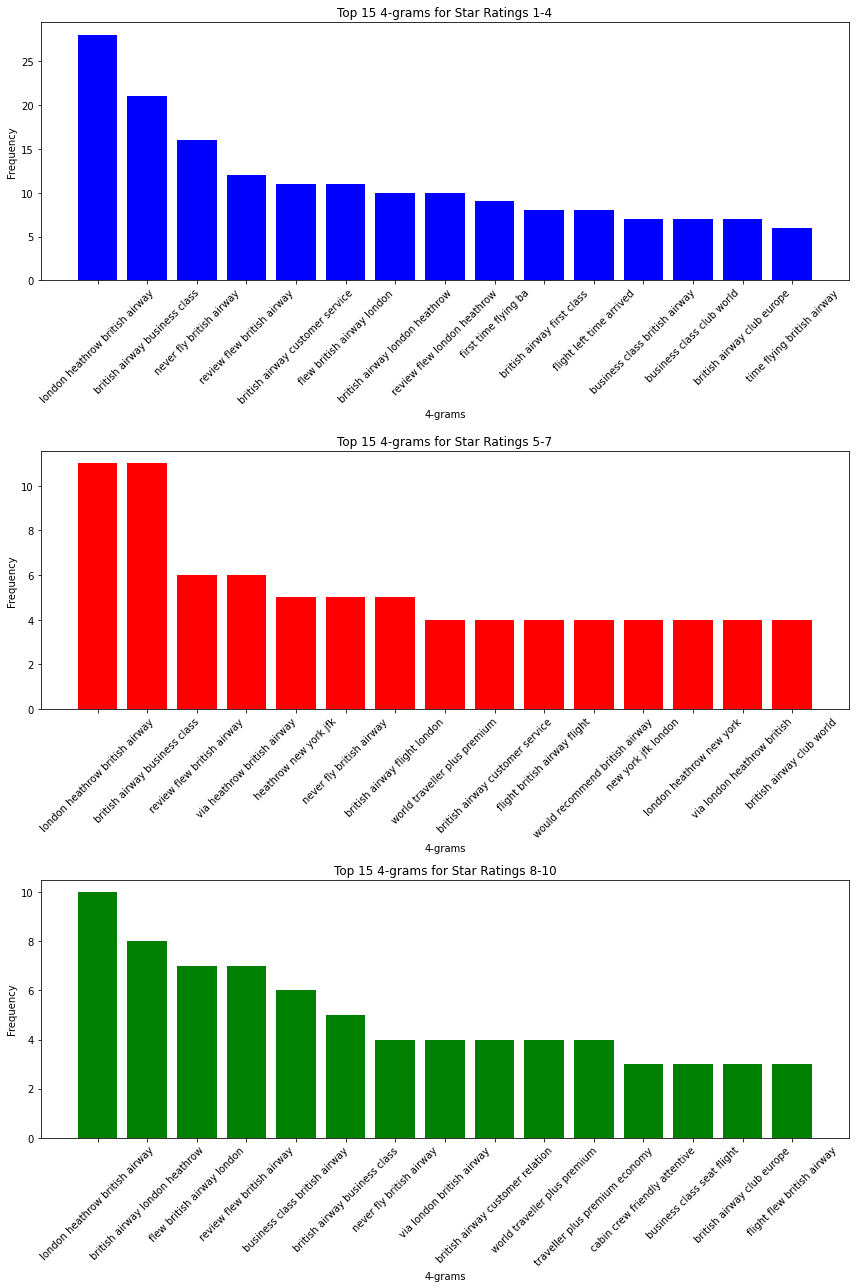

In [185]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Get the top 15 4-grams for ratings 1-4
top_ngrams_1_4 = get_freq_dist_ngrams(reviews_1_4, n=4, top_n=15)
ngram_labels = [" ".join(ngram) for ngram, _ in top_ngrams_1_4]
ngram_frequencies = [freq for _, freq in top_ngrams_1_4]
axes[0].bar(ngram_labels, ngram_frequencies, color='blue')
axes[0].set_xlabel('4-grams')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Top 15 4-grams for Star Ratings 1-4')
axes[0].tick_params(rotation=45, axis='x', labelrotation=45)

# Get the top 15 4-grams for ratings 5-7
top_ngrams_5_6 = get_freq_dist_ngrams(reviews_5_6, n=4, top_n=15)
ngram_labels = [" ".join(ngram) for ngram, _ in top_ngrams_5_6]
ngram_frequencies = [freq for _, freq in top_ngrams_5_6]
axes[1].bar(ngram_labels, ngram_frequencies, color='red')
axes[1].set_xlabel('4-grams')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Top 15 4-grams for Star Ratings 5-7')
axes[1].tick_params(rotation=45, axis='x', labelrotation=45)

# Get the top 15 4-grams for ratings 8-10
top_ngrams_7_10 = get_freq_dist_ngrams(reviews_7_10, n=4, top_n=15)
ngram_labels = [" ".join(ngram) for ngram, _ in top_ngrams_7_10]
ngram_frequencies = [freq for _, freq in top_ngrams_7_10]
axes[2].bar(ngram_labels, ngram_frequencies, color='green')
axes[2].set_xlabel('4-grams')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Top 15 4-grams for Star Ratings 8-10')
axes[2].tick_params(rotation=45, axis='x', labelrotation=45)

plt.tight_layout()
plt.show()


In [175]:
from textblob import TextBlob

# Create a function to perform sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis function to each review and add polarity column
df['polarity'] = df['reviews'].apply(analyze_sentiment)

# Count positive comments within specific polarity score ranges
positive_comments_range_1 = df[(df['polarity'] > -0.2) & (df['polarity'] < 0.2)].shape[0]
positive_comments_range_2 = df[(df['polarity'] > -0.1) & (df['polarity'] < 0.1)].shape[0]

print(f"{positive_comments_range_1} number of reviews between -0.2 and 0.2 polarity score")
print(f"{positive_comments_range_2} number of reviews between -0.1 and 0.1 polarity score")

2327 number of reviews between -0.2 and 0.2 polarity score
1354 number of reviews between -0.1 and 0.1 polarity score


The polarity score is allocated on a scale spanning from -1 to 1. As the score nears -1, it signifies a negative review, while the converse is true for positive values. By establishing a threshold, reviews with a polarity exceeding 0.2 are categorized as positive, and those below -0.2 are tagged as negative. This results in 2331 reviews classified as neutral. To further enhance the precision of this set of neutral reviews, let's apply a narrower threshold of 0.1.

We will now explore an alternate strategy to classify reviews as positive or negative. For this purpose, we will employ the VADER algorithm from the NLTK library.

In [176]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Create a function to get sentiment label
def get_sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply VADER sentiment analysis and get sentiment label for each review
df['vader_scores'] = df['reviews'].apply(lambda text: sia.polarity_scores(text)['compound'])
df['sentiment_label'] = df['vader_scores'].apply(get_sentiment_label)

In [177]:
#Let's count positive and negative values
sentiment_counts = df.sentiment_label.value_counts()
print(sentiment_counts)

Positive    2306
Negative    1125
Neutral       19
Name: sentiment_label, dtype: int64


### Topic Modelling (LDA)



Our reviews have undergone preprocessing and cleaning procedures. Nonetheless, to streamline the process of topic modeling, it's necessary to construct word embeddings or a matrix of words. To accomplish this task, we will make use of the count vectorizer technique provided by the sklearn library.

In [178]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a CountVectorizer to convert text data to document-term matrix
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform(df['reviews'])

# Apply Latent Dirichlet Allocation (LDA) model
num_topics = 10  # Number of topics to identify
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda.fit(dtm)

# Create a DataFrame to store topic information
topic_df = pd.DataFrame(columns=['Topic', 'Top Words'])

# Print topics and their associated words
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topic_df.loc[topic_idx] = [f"Topic {topic_idx}", ', '.join(top_words)]

# Associate each document with its most probable topic
topic_probabilities = lda.transform(dtm)
df['topic'] = topic_probabilities.argmax(axis=1)

In [179]:
topic_df.head()

,Topic,Top Words
0,Topic 0,"british, airway, flight, aircraft, ba, service..."
1,Topic 1,"seat, check, boarding, row, club, ba, lounge, ..."
2,Topic 2,"flight, time, crew, good, cabin, heathrow, ser..."
3,Topic 3,"flight, hour, ba, bag, staff, london, luggage,..."
4,Topic 4,"good, ba, club, seat, lounge, food, flight, se..."


### Topic Modeling (NMF)

In [180]:
#Import libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF


# Create a CountVectorizer to convert text data to document-term matrix
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform(df['reviews'])

# Apply Non-Negative Matrix Factorization (NMF) model
number_of_topics = 3
nmf_model = NMF(n_components=number_of_topics, random_state=0)
nmf_model.fit(dtm)

# Get the feature names (words) from the CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Initialize dictionaries to store topic words and weights
topic_words = {}
topic_weights = {}

# Populate dictionaries with topic words and weights
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words_indices = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_indices]
    top_weights = [round(topic[i], 1) for i in top_words_indices]
    
    topic_words[f"Topic {topic_idx} words"] = top_words
    topic_weights[f"Topic {topic_idx} weights"] = top_weights

# Create DataFrames for topic words and topic weights
topic_words_df = pd.DataFrame(topic_words)
topic_weights_df = pd.DataFrame(topic_weights)

# Combine both DataFrames
topics_and_weights_df = pd.concat([topic_words_df, topic_weights_df], axis=1)

C:\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [182]:

topics_and_weights_df

,Topic 0 words,Topic 1 words,Topic 2 words,Topic 0 weights,Topic 1 weights,Topic 2 weights
0,flight,seat,ba,12.8,8.6,10.6
1,hour,class,service,2.6,2.9,2.4
2,airway,cabin,airline,2.1,2.5,1.9
3,british,food,staff,2.1,2.3,1.3
4,time,good,customer,2.1,2.3,1.1
5,london,business,lounge,2.1,2.2,1.1
6,heathrow,crew,time,1.3,2.2,1.0
7,service,economy,year,1.3,2.1,1.0
8,day,service,passenger,1.0,1.7,0.9
9,told,club,fly,1.0,1.4,0.9
